SUMMARY OF FILE

1. **Data Cleaning and Preparation**:
   - Renaming columns for clarity.
   - Dropping rows with NaN values and values out of range.
   - Ensuring fairness in the distribution of disease presence labels.

2. **Exploratory Data Analysis (EDA)**:
   - Visualizing relationships between continuous variables and disease presence using histograms and scatter plots.
   - Noting surprising insights such as the dual peak in disease presence at younger ages and exploring potential explanations.
   - Examining boxplots to observe distributions and potential outliers.
   - Visualizing the distribution of disease presence across categorical variables using bar plots.
   - Using a correlation heatmap to understand the relationship between variables and disease presence.

3. **Statistical Analysis**:
   - Conducting t-tests and ANOVA to determine significant differences between groups with and without heart disease.
   - Identifying variables with p-values greater than 0.05 for potential removal from the dataset.
   

4. **Insights and Recommendations**:
   - Age, resting blood pressure, max heart rate achieved, ST depression, chest pain type, resting ECG results, peak exercise ST slope, number of major vessels, gender, and exercise-induced angina are all significant factors associated with heart disease presence.
   - Serum cholesterol and fasting blood sugar, having p-values greater than 0.05, are recommended for removal from the dataset.


# background and practical motivation.


Heart diseases accounted for 31.4% of all deaths in 2022 in Singapore. 
https://myheart.org.sg/health/heart-disease-statistics/#:~:text=In%20Singapore%2C%2023%20people%20die,to%20heart%20diseases%20or%20stroke.


In Singapore alone, heart diseases claimed nearly a third of all lives in 2022. But what if we could change that? What if we could develop tools that help doctors identify those at risk early on, allowing for timely interventions and personalized treatments?

By harnessing the power of technology and medical research, we can create predictive models that analyze factors like age, blood pressure, cholesterol levels, and more to identify individuals at high risk of heart disease. This proactive approach not only saves lives but also improves the quality of life for patients and their families.

Moreover, these efforts don't just benefit individuals; they also inform public health initiatives and drive innovation in healthcare. By empowering people to take control of their heart health and providing healthcare providers with the tools they need to intervene effectively, we can make significant strides towards reducing the burden of heart disease in our communities.

In short, the journey to predicting and preventing heart diseases based on physical characteristics is about more than just numbers and statistics—it's about giving people hope and the opportunity to lead healthier, longer lives.




What if we could reduce the number of deaths due to heart diseases?

What if we could create something that helps predict heart disease and help doctors treat much more quickly?




# Problem Definition

Problem Definition:
Given a dataset containing various physical characteristics and medical attributes of individuals, the task is to develop a predictive model that can accurately identify the risk of heart disease for an individual. The goal is to create a tool that can assist healthcare professionals in early detection, treatment, and prevention of heart diseases, thereby reducing the number of deaths and improving the quality of life for affected individuals and their families in Singapore.

We want to explore the topic of heart diseases and how we can predict such issues.

In [1]:
#imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import scipy.stats
import sklearn
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#read in data
data = pd.read_csv('heart.csv')
print('Shape of the data is ', data.shape)

Shape of the data is  (303, 14)


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Description

As seen, there are 303 datapoints (excluding header) and 13 target classification factors.


- Age: Age in years
- Sex:
    - 1 = male
    - 0 = female
    
- CP: Chest pain type: a type of chest pain caused by reduced blood flow to the heart.
    - 0: typical angina
    - 1: atypical angina
    - 2: non-anginal pain
    - 3: asymptomatic
    
- Trestbps: Resting blood pressure (in mm Hg on admission to the hospital) NUMERIC

- Chol: Serum cholesterol in mg/dl NUMERIC

- Fbs: Fasting blood sugar > 120 mg/dl
    - 1 = true
    - 0 = false
    
    
- Restecg: Resting electrocardiographic results
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
    
- Thalach: Maximum heart rate achieved #NUMERIC

- Exang: Exercise induced angina
    - 1 = yes
    - 0 = no
    
- Oldpeak: ST depression induced by exercise relative to rest #NUMERIC


- Slope: The slope of the peak exercise ST segment
    - 0: upsloping
    - 1: flat
    - 2: downsloping
    
- CA: Number of major vessels (0-3) colored by fluoroscopy

- Thal:
    - 0 = error (in the original dataset 0 maps to NaN's)
    - 1 = fixed defect
    - 2 = normal
    - 3 = reversible defect
    
- Target: The label:
    - 0 = no disease
    - 1 = disease




# Data Cleaning and Processing


Firstly, it is not very clear what each name represents for certain ones. like, what is chol? oldpeak?, therefore we will rename them based on the definitions.


In [4]:
# Rename the columns with clearer definitions
data.rename(columns={
    'age': 'age_in_years',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'serum_cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_ecg_results',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'peak_exercise_st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'target': 'disease_presence'
}, inplace=True)


## We will have to check for NaN and drop values out of range.

In [5]:
# Drop rows with NaN values
data.dropna(inplace=True)

# Define ranges for each feature
ranges = {
    'age_in_years': (0, 150),  # Assuming maximum human age
    'gender': (0, 1),
    'chest_pain_type': (0, 3),
    'resting_blood_pressure': (0, None),  # Assuming blood pressure can't be negative
    'serum_cholesterol': (0, None),  # Assuming cholesterol can't be negative
    'fasting_blood_sugar': (0, 1),
    'resting_ecg_results': (0, 2),
    'max_heart_rate_achieved': (0, None),  # Assuming heart rate can't be negative
    'exercise_induced_angina': (0, 1),
    'st_depression': (0, None),  # Assuming ST depression can't be negative
    'peak_exercise_st_slope': (0, 2),
    'num_major_vessels': (0, 3),  # Drop values where 'ca' is 4 or greater
    'thalassemia': (1, 3),  # Drop values where 'thal' is 0
    'disease_presence': (0, 1)
}

# Drop values out of range
for feature, (min_val, max_val) in ranges.items():
    if max_val is not None:
        data = data[(data[feature] >= min_val) & (data[feature] <= max_val)]
    else:
        data = data[data[feature] >= min_val]

print("\nDataset after dropping NaN values, values out of range, and incorrect values:")
print(data.head())


Dataset after dropping NaN values, values out of range, and incorrect values:
   age_in_years  gender  chest_pain_type  resting_blood_pressure  \
0            63       1                3                     145   
1            37       1                2                     130   
2            41       0                1                     130   
3            56       1                1                     120   
4            57       0                0                     120   

   serum_cholesterol  fasting_blood_sugar  resting_ecg_results  \
0                233                    1                    0   
1                250                    0                    1   
2                204                    0                    0   
3                236                    0                    1   
4                354                    0                    1   

   max_heart_rate_achieved  exercise_induced_angina  st_depression  \
0                      150                   

In [6]:
# we have dropped a few datas. Lets see how many we dropped:

print(len(data),", original was: 303")

print(data['disease_presence'].unique())

296 , original was: 303
[1 0]


## explore data balancing

We want the ratio of have disease and no disease to be of similar percentage.

imbalanced datasets, where one class (e.g., presence of disease) is significantly more prevalent than the other class (e.g., absence of disease), can bias the model towards the majority class. This bias can lead to poor performance, where the model may struggle to accurately predict the minority class.


Lets explore the fairness in distribution of all data:

In [7]:
# Count the number of data points with and without disease
disease_counts = data['disease_presence'].value_counts()

# Print the counts
print("Number of data points that are positive for heart disease:", disease_counts[1])
print("Number of data points that are negative for heart disease:", disease_counts[0])

# Calculate the percentage of positive cases
percentage_positive = disease_counts[1] * 100 / (disease_counts[1] + disease_counts[0])
percentage_negative = disease_counts[0] * 100 / (disease_counts[1] + disease_counts[0])

# Print the percentage with formatting
print("Percentage of positive cases: {:.2f}%".format(percentage_positive))
print("Percentage of negative cases: {:.2f}%".format(percentage_negative))


Number of data points that are positive for heart disease: 160
Number of data points that are negative for heart disease: 136
Percentage of positive cases: 54.05%
Percentage of negative cases: 45.95%


## comment on ratio

the ratio seems very fair at 54% vs 46%, which means the dataset is fair and unbiased when it comes to prediction later on.

## lastly, we will want to do analysis based on catagories.

However, all types are given as int or float, despite there clearly being certain categories. so, lets group them together for our sake.

In [8]:
continuous_features = ['age_in_years', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate_achieved', 'st_depression']
categorical_features = ['gender', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg_results', 'exercise_induced_angina', 'peak_exercise_st_slope', 'num_major_vessels', 'thalassemia']

# EXPLORATORY DATA ANALYSIS

# observing relationships between disease and factors.


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age_in_years,296.0,54.523649,9.059471,29.0,48.0,56.0,61.00,77.0
gender,296.0,0.679054,0.467631,0.0,0.0,1.0,1.00,1.0
chest_pain_type,296.0,0.959459,1.034184,0.0,0.0,1.0,2.00,3.0
resting_blood_pressure,296.0,131.604730,17.726620,94.0,120.0,130.0,140.00,200.0
serum_cholesterol,296.0,247.155405,51.977011,126.0,211.0,242.5,275.25,564.0
fasting_blood_sugar,296.0,0.145270,0.352970,0.0,0.0,0.0,0.00,1.0
resting_ecg_results,296.0,0.523649,0.526692,0.0,0.0,1.0,1.00,2.0
max_heart_rate_achieved,296.0,149.560811,22.970792,71.0,133.0,152.5,166.00,202.0
exercise_induced_angina,296.0,0.327703,0.470171,0.0,0.0,0.0,1.00,1.0
st_depression,296.0,1.059122,1.166474,0.0,0.0,0.8,1.65,6.2


## it is really hard to visualise the data given the table above. 

therefore, spilt them into continuous and categorical for better visualisation, and plot them too.

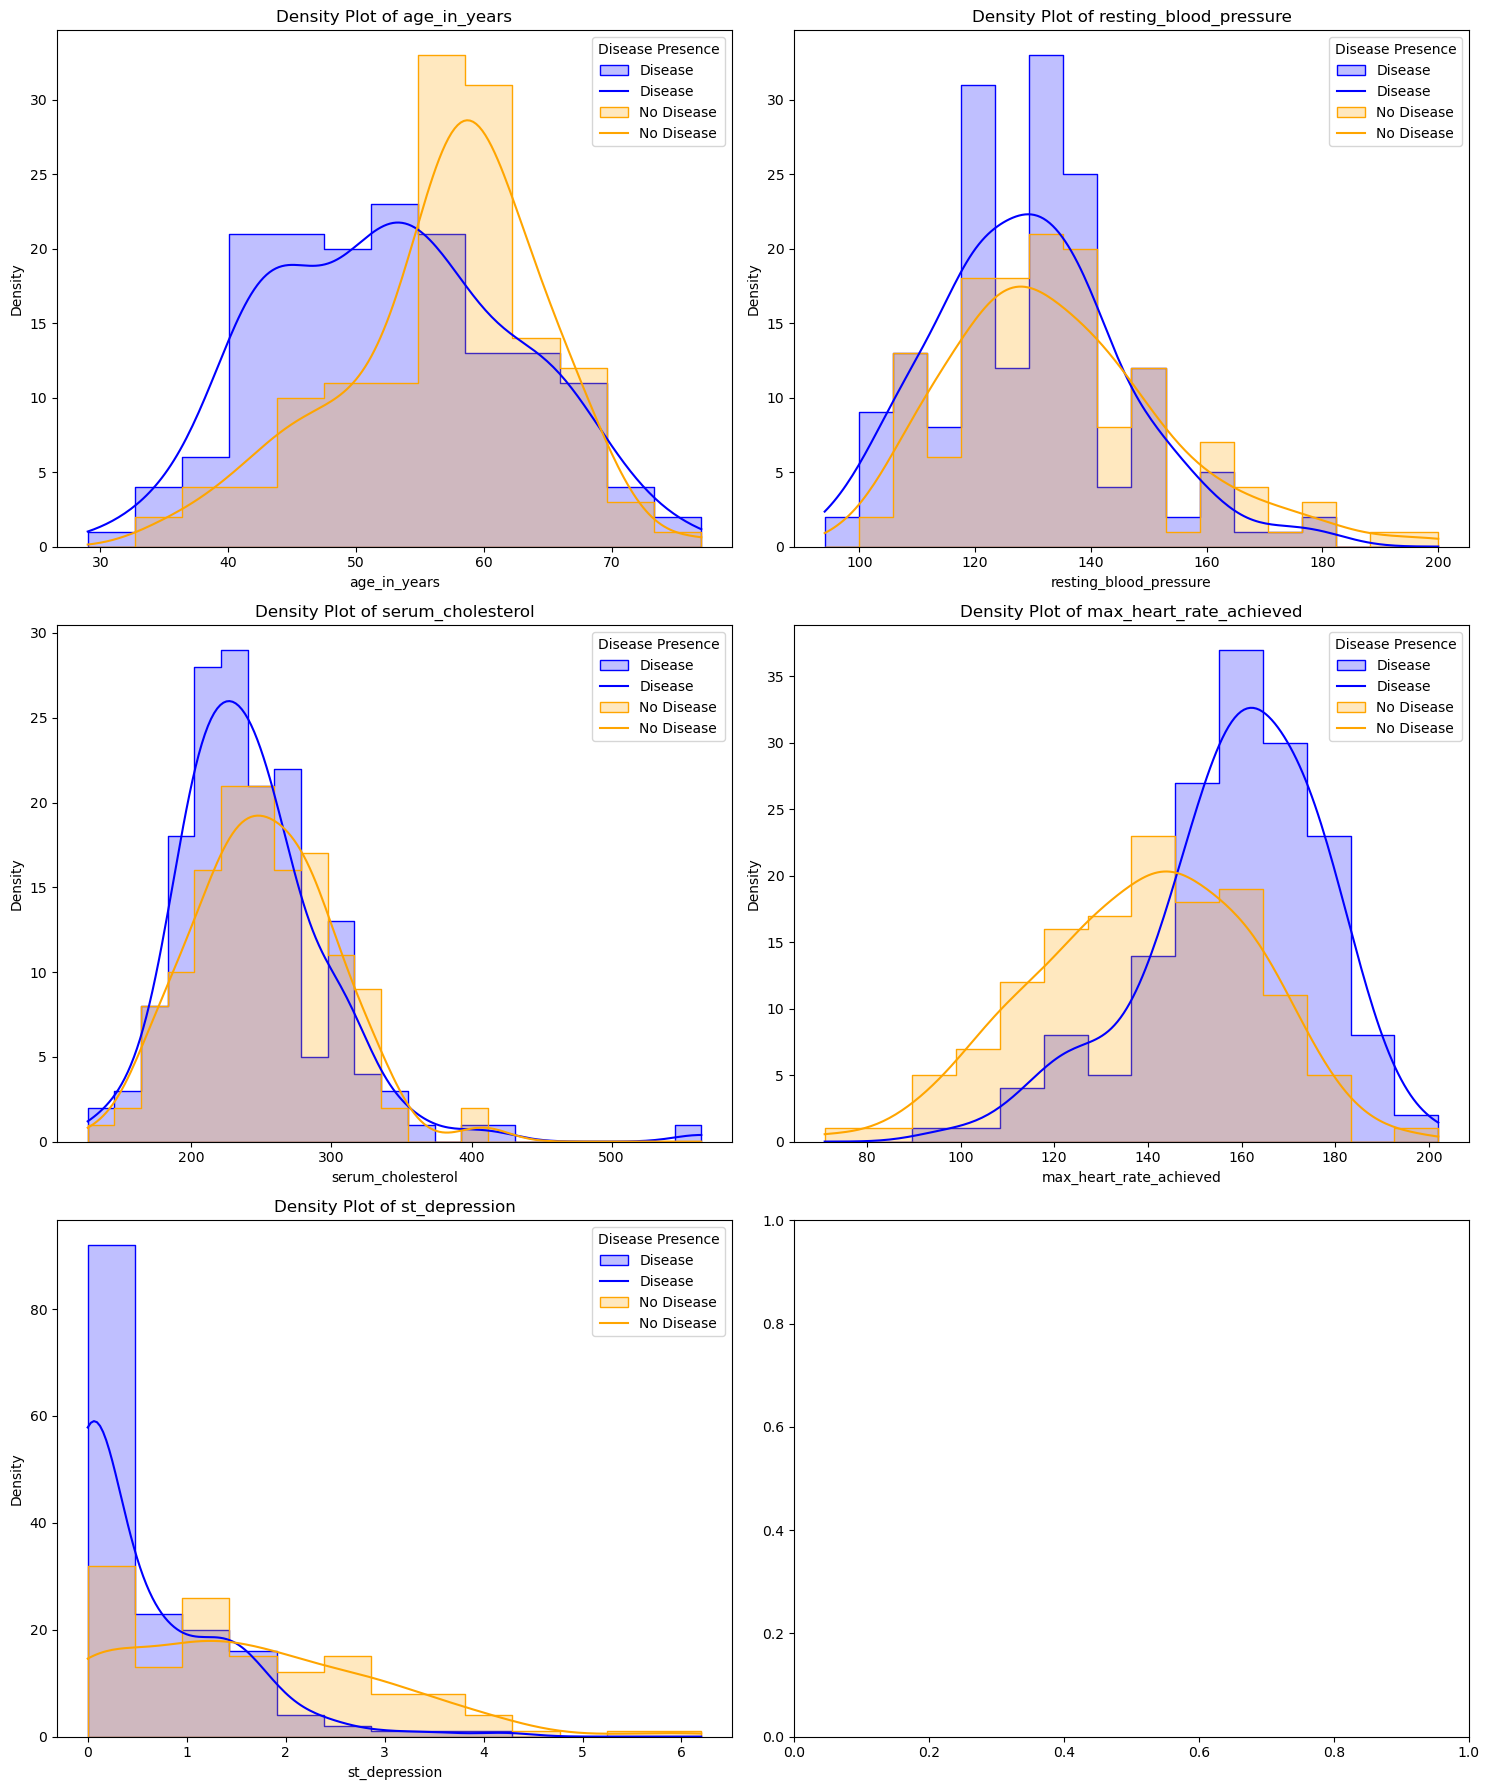

In [10]:
# Set up subplots
num_plots = len(continuous_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define colors for the legend labels, one for each category
colors = ['orange','blue' ]  # Swapping the order of colors

# Loop through continuous features and create density plots
for i, feature in enumerate(continuous_features):
    sns.histplot(data=data, x=feature, hue='disease_presence', kde=True, ax=axes[i], element='step', common_norm=False, palette=colors)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend(title='Disease Presence', labels=['Disease', 'Disease','No Disease', 'No Disease', ])  # Reverting the legend labels back

# Adjust layout
plt.tight_layout()
plt.show()

# INTERESTING INSIGHTS!

Interestingly, we discovered the presence of dual peaks in the density plot of age_in_years. Considering that heart disease is more commonly occurring in older aged people, our finding shows otherwise. Young individuals are likely to develop heart disease too! Therefore, we want to explore why this is the case, and what is attributing to this factor.

Linear Regression for resting_blood_pressure with respect to Age:
Slope: 0.5649000663205944
Intercept: 100.80431699206733
R-squared: 0.08334835898792498
P-value: 4.3263215586426023e-07
Standard Error: 0.10925758426803313

Linear Regression for serum_cholesterol with respect to Age:
Slope: 1.1527384349539813
Intercept: 184.30389999418142
R-squared: 0.04036868718123491
P-value: 0.0005058206520150981
Standard Error: 0.3277834340373566

Linear Regression for max_heart_rate_achieved with respect to Age:
Slope: -1.00405137480931
Intercept: 204.30535519610626
R-squared: 0.1568070534262327
P-value: 1.4907885811629792e-12
Standard Error: 0.1357884889084571

Linear Regression for st_depression with respect to Age:
Slope: 0.025670758227318777
Intercept: -0.34054178050911377
R-squared: 0.03974959685518923
P-value: 0.0005598961040730693
Standard Error: 0.007358527481491975



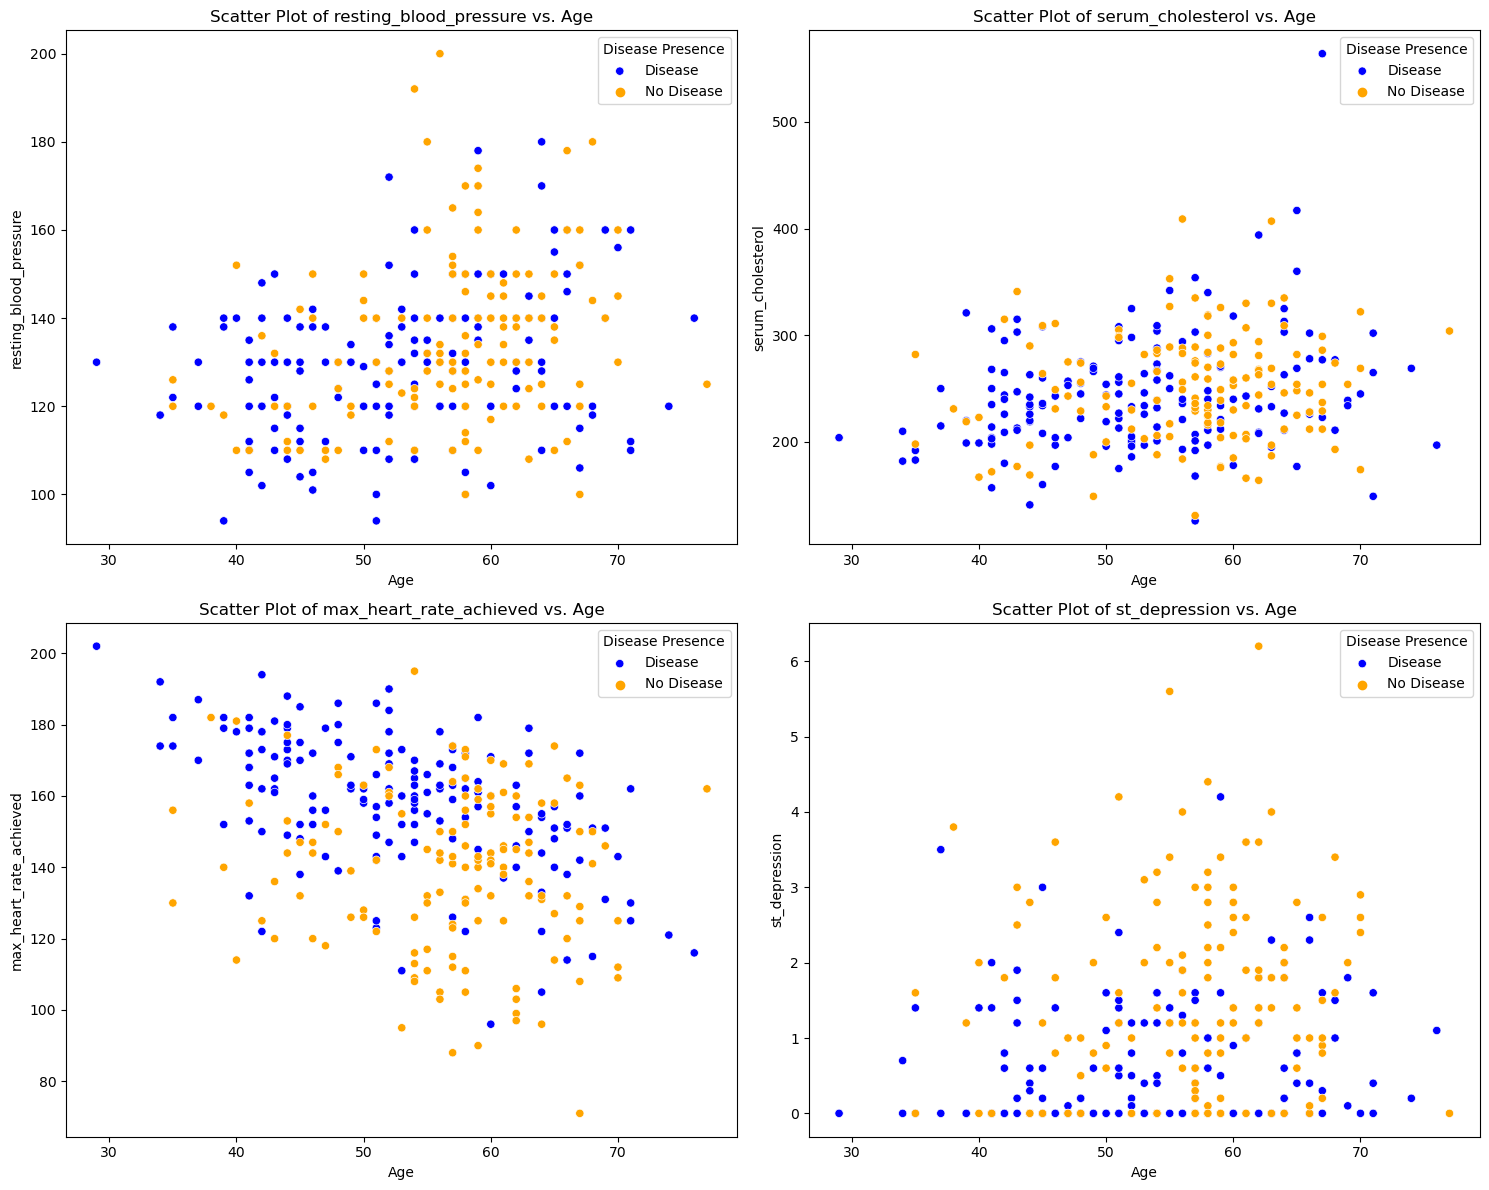

In [11]:
# Set up subplots
num_plots = len(continuous_features) - 1  # Excluding age_in_years for y-axis
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Define colors for the legend labels, one for each category
colors = ['orange','blue']

# Loop through other continuous features and create density plots
for i, feature in enumerate(continuous_features[1:]):  # Excluding age_in_years
    sns.scatterplot(data=data, x='age_in_years', y=feature, hue='disease_presence', palette=colors, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {feature} vs. Age')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel(feature)
    axes[i].legend(title='Disease Presence', labels=['Disease','No Disease'])
    slope, intercept, r_value, p_value, std_err = linregress(data['age_in_years'], data[feature])
    # Print linear regression results
    print(f"Linear Regression for {feature} with respect to Age:")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-squared: {r_value**2}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}\n")

# Adjust layout
plt.tight_layout()
plt.show()


## explanation for high disease rate in younger individuals.

it appears that younger individuals with elevated maximum_heart_rate_achieved are more prone to heart conditions, which can be used to explain the high disease presence peak in younger individuals.

Therefore, when we are doing prediction, we want to keep this in mind, where age and max heart rate reached should go hand in hand when predicting disease presence in younger individuals.

# lets visualise using boxplot as well.

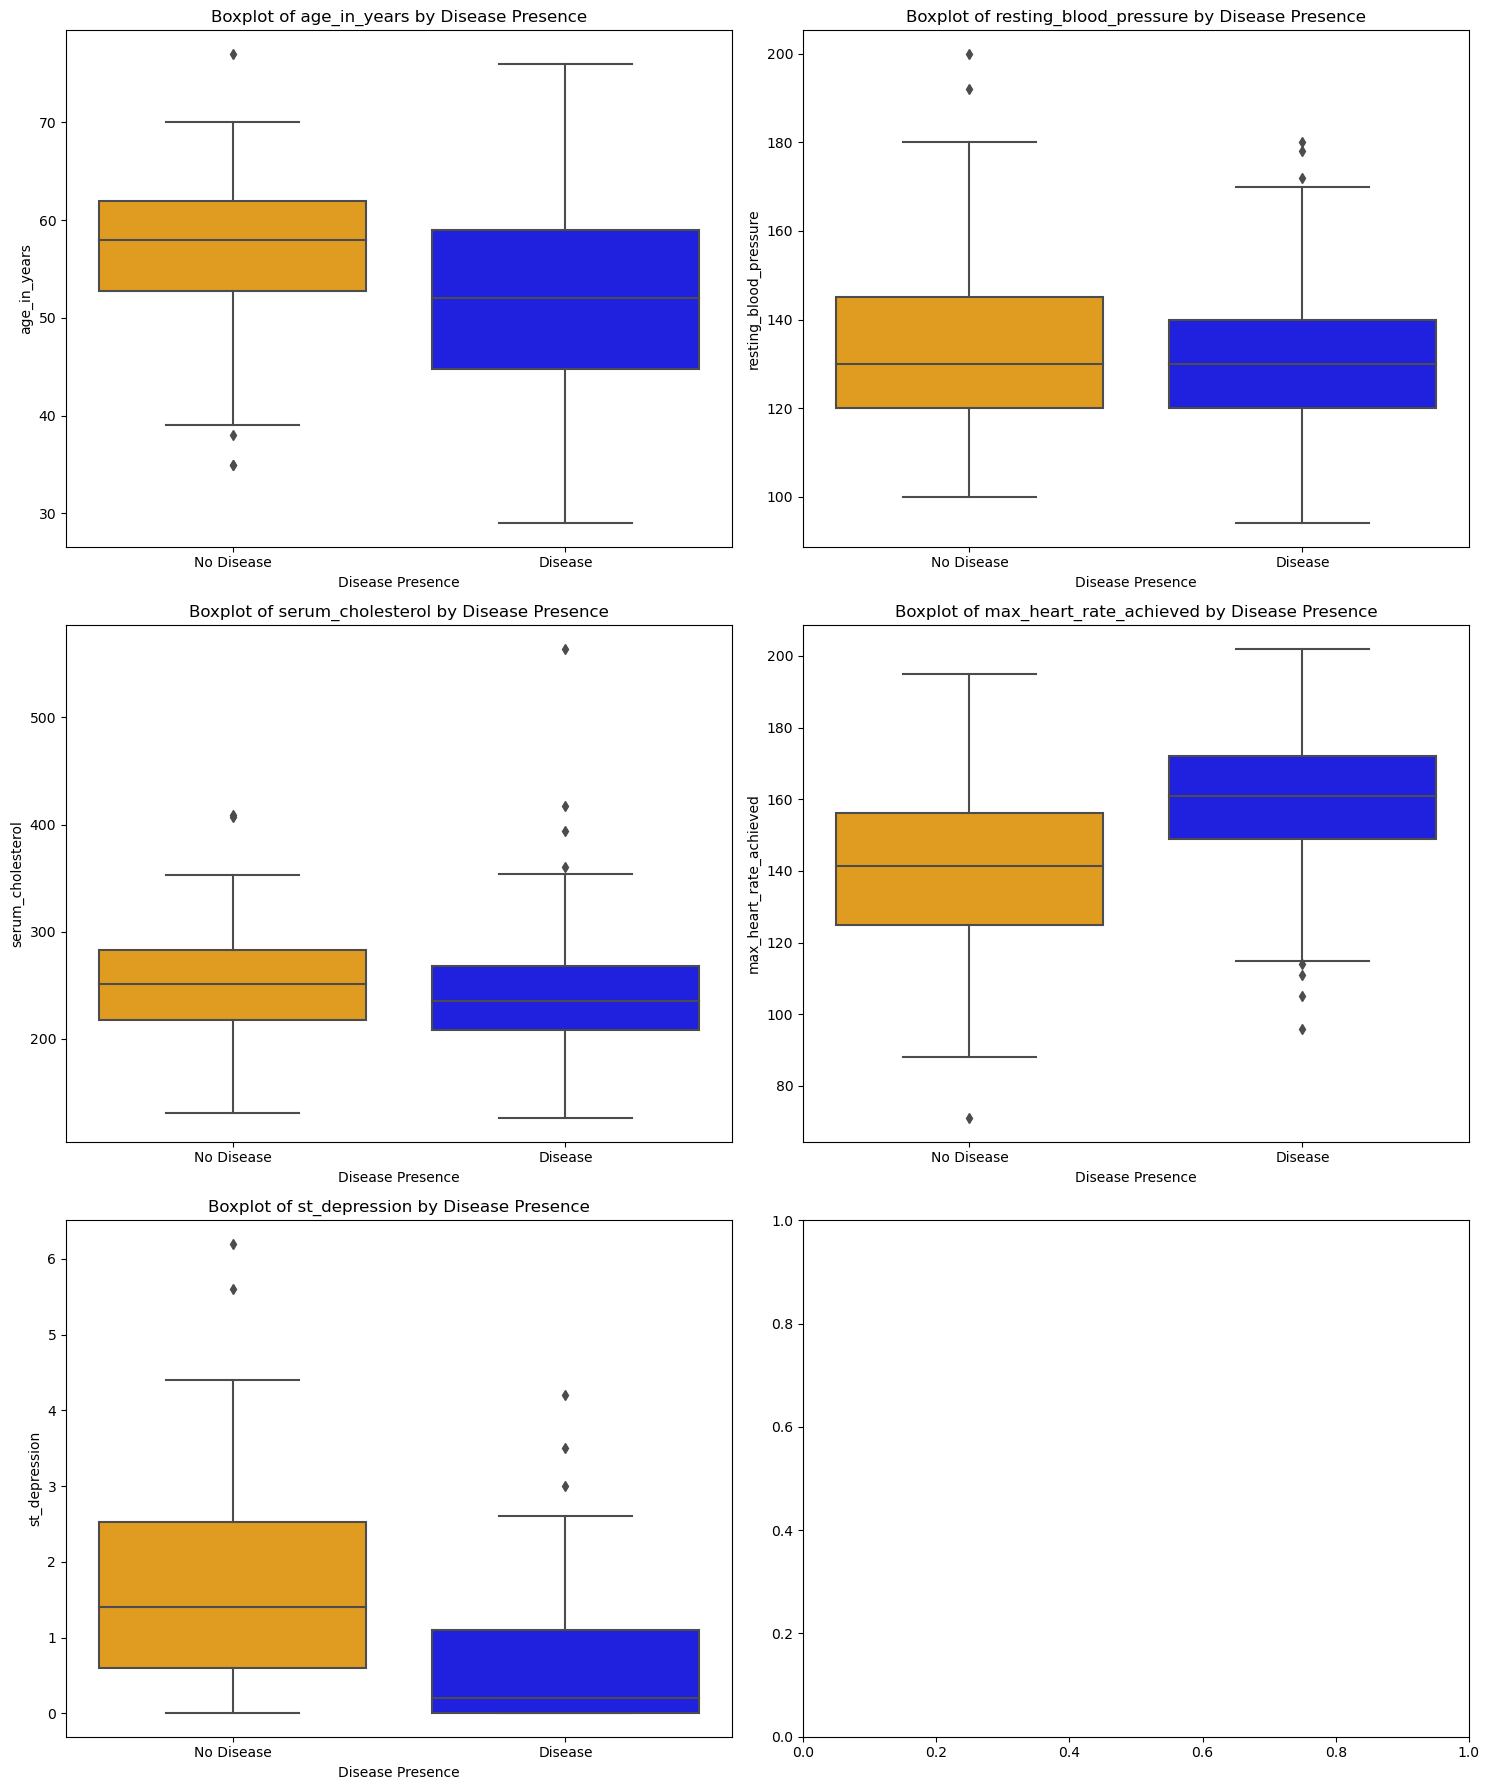

In [12]:
# Set up subplots
num_plots = len(continuous_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

# Loop through the continuous features and create boxplots
for i, feature in enumerate(continuous_features):
    ax = axes[i // num_cols][i % num_cols]  # Get the current axis
    
    # Create the boxplot with swapped colors
    sns.boxplot(data=data, x='disease_presence', y=feature, ax=ax, palette=['orange', 'blue'])  # Swapped colors
    
    # Set labels and title
    ax.set_title(f'Boxplot of {feature} by Disease Presence')
    ax.set_xlabel('Disease Presence')
    ax.set_ylabel(feature)
    
    # Set x-axis tick labels
    ax.set_xticklabels(['No Disease','Disease'])  # Adjusted tick labels

# Adjust layout
plt.tight_layout()
plt.show()


# DO NOT REMOVE OUTLIERS.

We do observe some outliers in our boxplot, however,

We decided not to remove outliers from continuous variables for the following reason:

1. Clinical Relevance: Outliers in heart disease data may represent extreme physiological conditions or rare medical conditions that are clinically relevant.  Removing such outliers could lead to the exclusion of critical cases that are important for understanding the full spectrum of heart disease and its risk factors.

\

2. Diagnostic Accuracy: Outliers in heart disease data might include extreme values for diagnostic measures such as blood pressure, cholesterol levels, or heart rate. While these values may be unusual, they could still be valid indicators of an individual's cardiovascular health status. Removing them without clinical justification could distort diagnostic accuracy and lead to misclassification of patients.

\


3. Predictive Modeling: Outliers can influence the performance of predictive models used to assess the risk of heart disease. While outliers may introduce noise or variability into the data, they may also contain valuable information that improves the model's ability to discriminate between high-risk and low-risk individuals. Removing outliers indiscriminately could result in models that are less effective at identifying individuals at risk of heart disease.

# now, for categorical factors;

/var/folders/gc/5lgf6rk93clbmxq7vmnjw23c0000gn/T/ipykernel_28011/871659081.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=feature, y='disease_presence', hue='disease_presence', ax=ax, ci=None, estimator=lambda x: len(x) / len(data) * 100)
/var/folders/gc/5lgf6rk93clbmxq7vmnjw23c0000gn/T/ipykernel_28011/871659081.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=feature, y='disease_presence', hue='disease_presence', ax=ax, ci=None, estimator=lambda x: len(x) / len(data) * 100)
/var/folders/gc/5lgf6rk93clbmxq7vmnjw23c0000gn/T/ipykernel_28011/871659081.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x=feature, y='disease_presence', hue='disease_presence', ax=ax, ci=None, estimator=lambda x: len(x) / len(data) * 100)
/var/folders/gc/5lgf6rk93clbmxq7vmnjw23c000

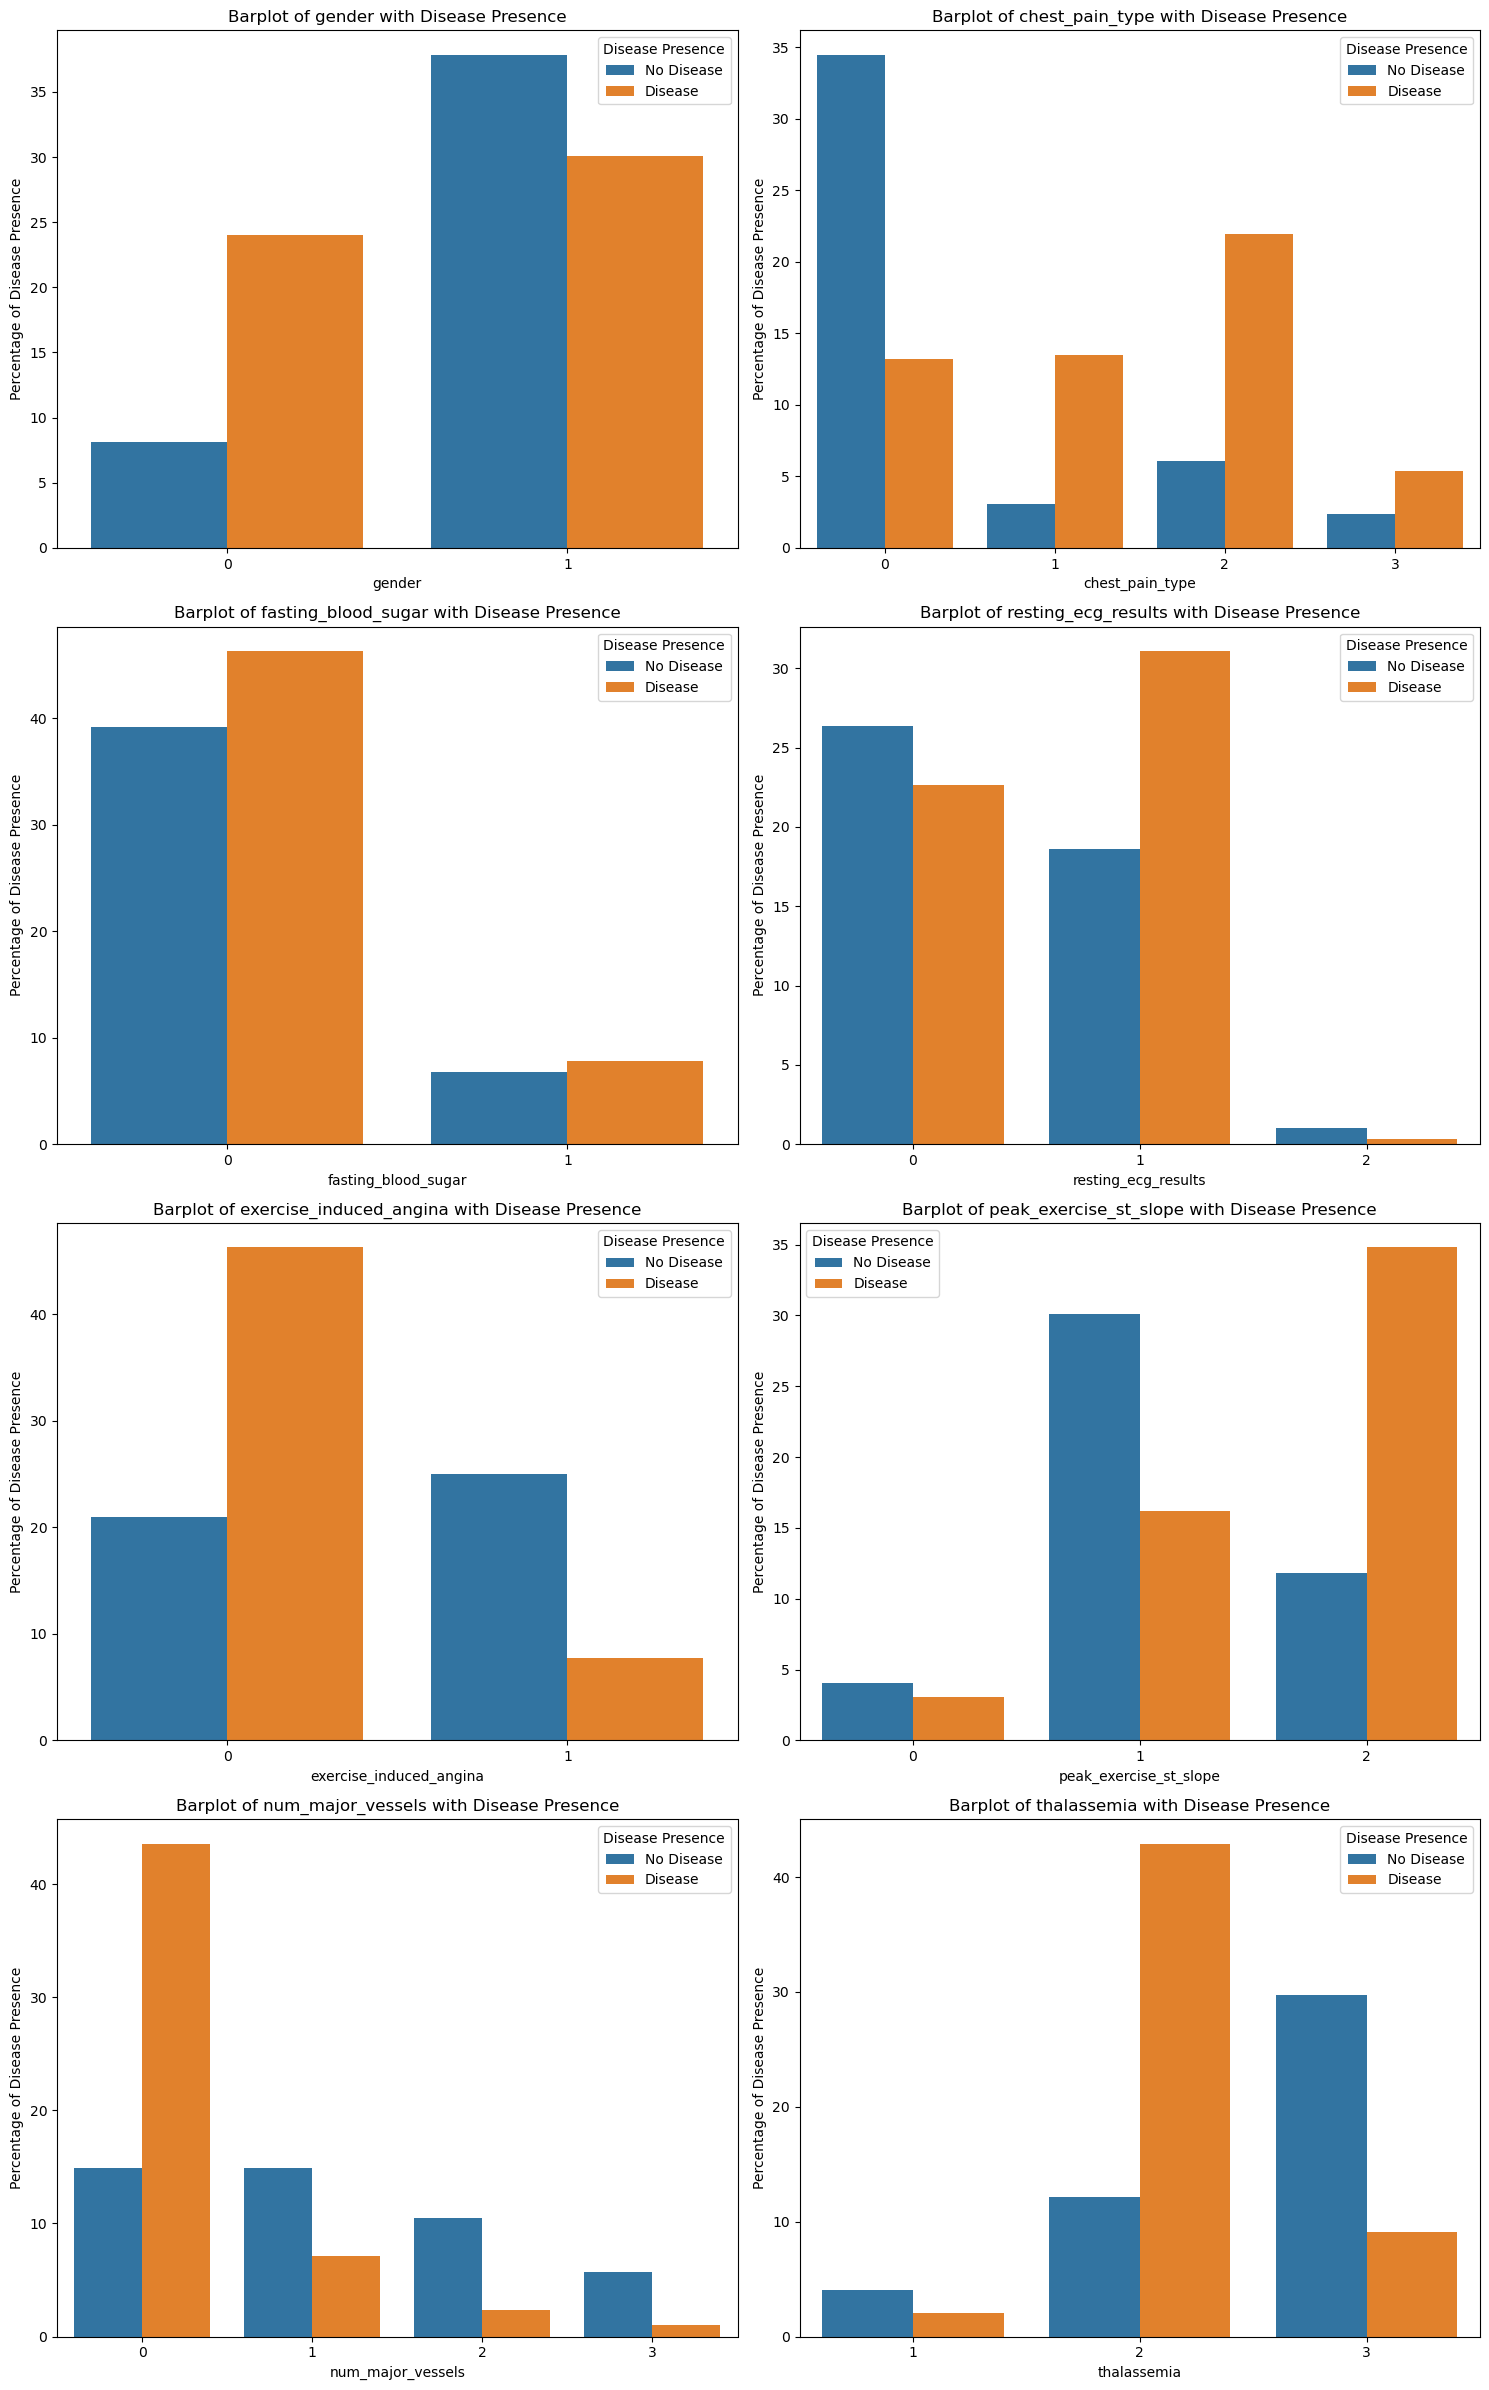

In [13]:

num_plots = len(categorical_features)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6*num_rows))

# Loop through the categorical features and create barplots
for i, feature in enumerate(categorical_features):
    ax = axes[i // num_cols][i % num_cols]  # Get the current axis
    
    # Create the barplot
    sns.barplot(data=data, x=feature, y='disease_presence', hue='disease_presence', ax=ax, ci=None, estimator=lambda x: len(x) / len(data) * 100)
    
    # Set labels and title
    ax.set_title(f'Barplot of {feature} with Disease Presence')
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage of Disease Presence')
    
    # Set legend
    ax.legend(title='Disease Presence', labels=['No Disease', 'Disease'])

# Adjust layout
plt.tight_layout()
plt.show()


# analysis:

we do observe significant differences in bar sizes between a person with and without disease for all categorical factors we have listed: this shows that each factor is significant when dealing with somone with heart disease and should consider it when doing predicition as well.

We do observe significant differences in bar sizes between a person with and without disease for all categorical factors we have listed: this shows that each factor is significant when dealing with someone with heart disease and should consider it when doing prediction as well.

Aside  of comparing between a person with and without disease, we could also observe that, within each variable itself, the bar graphs vary significantly across different types and categories.For instance, consider the variable representing chest pain type. By examining the distribution of this variable among individuals with the disease, we might find that a substantial number of them report experiencing non-anginal chest pain compared to other types of chest pain. This observation highlights a significant variation in the manifestation of symptoms within the disease group. 

Another example involves the variable indicating the number of major vessels observed using colored fluoroscopy. Within the dataset, we may notice substantial differences in the counts of major vessels across different colored fluoroscopy images. This variation could suggest important distinctions in the severity or progression of the disease based on the vascular findings captured by fluoroscopy.

With this, it offers us valuable insights into the diversity and complexity of the disease.

# HEATMAP FOR SUMMARY OF ALL FACTORS IN RELATION TO DISEASE PRESENCE.

Next up, we will look at a heatmap for a summary of all factors in relation to disease presence. Heatmap shows the rough correlation among one another. We wish that our variables have lower correlation with each other, while having a high correlation factor with disease presence itself. This helps to avoid overlapping of features’ usability multicollinearity problems in our predictive model later on while ensuring that the variable can help to improve the performance of our predictive model.

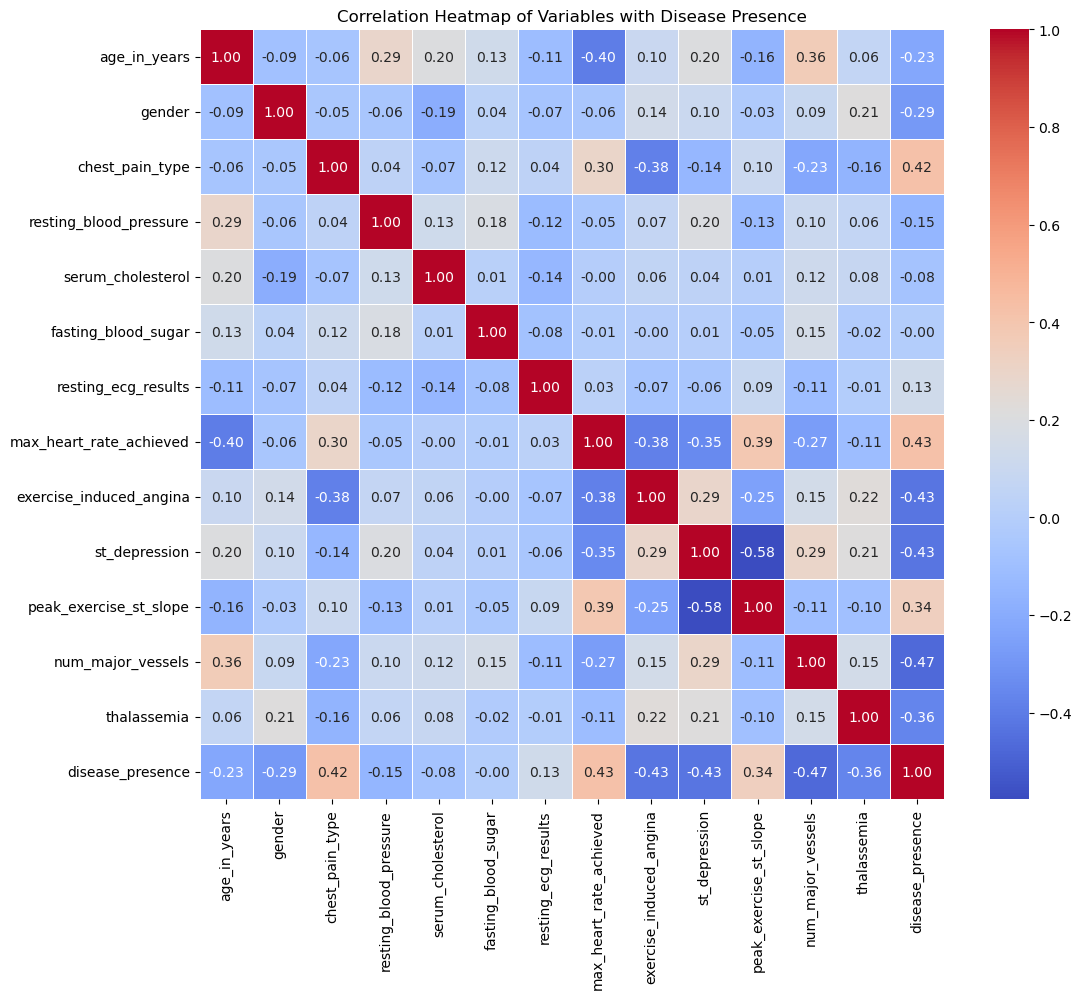

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add disease_presence to the data temporarily for visualization
data_with_disease = data.copy()
data_with_disease['disease_presence'] = data_with_disease['disease_presence'].astype('category')

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_with_disease.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap of Variables with Disease Presence')
plt.show()


# why heatmap is important and what it tells us:

heatmap shows the rough correlation between the 2 factors.

We wish that our variables have lower correlation with each other, while having high correlation factor with disease presence itself.

This is because if 2 factors are strongly correlated, presence of one in classification will affect the other feature's usability as they overlap.

From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonabily fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively. Age does not have have high correlation value at only -0.23, suggesting that it will not be able to predict disease presence.

From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52.
Therefore, we expect num_major_vessels to have the highest importance in determining whether one has disease.

## more analysis

From the numerical features num_major_vessels, max_heart_rate_achieved and st_depression are reasonably fairly correlated with the target variable at -0.47, 0.43 and -0.43 correlation coefficient respectively. 
- A negative correlation of -0.47 for num_major_vessels implies that as the number of major vessels observed decreases, the likelihood of disease presence increases.
- A positive correlation of 0.43 for max_heart_rate_achieved indicates that higher maximum heart rates achieved are associated with a higher likelihood of disease presence.
- Similarly, a negative correlation of -0.43 for st_depression suggests that higher ST depression levels are linked to a higher probability of disease presence.

Conversely, age shows a weaker correlation with the presence of disease, indicated by a correlation coefficient of -0.23. This relatively low correlation suggests that age alone may not be a strong predictor of disease presence. While age plays a role in cardiovascular health, its predictive power for disease presence in this context appears limited. 

From the categorical features chest_pain_type, num_major_vessels, thalassemia, and exercise_induced_angina are better correlated with the target variable, thalassemia being the highest at 0.52. This shows a strong positive linear relationships between these predictors with the presence of disease. 
Leveraging these insights in predictive modelling can enhance risk assessment and inform targeted interventions for at-risk populations and we  expect thalassemia to have the highest importance in determining whether one has disease.

# EXPLORING EACH FACTOR AGAINST DISEASE PRESENCE with statistics.

# T-test for two variables.

The t-test is used to compare the means of two groups (independent samples) to determine if they are statistically different from each other.

It is typically used when you have a binary categorical variable or two distinct groups within a categorical variable.

There are two types of t-tests: independent samples t-test (for comparing means of two independent groups) and paired samples t-test (for comparing means of two related groups).

The t-test assesses whether the means of the two groups are significantly different from each other based on the difference in means and the variability within each group.


## Since gender, exercise induced angina and blood sugar level has 2 levels only, we will be doing t-test for these 3.

# ANOVA for three or more variables.

A new method that was not taught in lectures.

ANOVA is used to compare the means of three or more groups to determine if there are statistically significant differences among them.

It is typically used when you have a categorical variable with three or more levels or groups, which is so in our case.

ANOVA partitions the total variance into different sources (between-group variance and within-group variance) and calculates an F-statistic to assess whether the variation between groups is significantly greater than the variation within groups.

ANOVA tests the null hypothesis that all group means are equal, and a significant result indicates that at least one group mean is different from the others.

# FINAL STEP OF EDA: RELATIONSHIP OF ALL FACTORS WITH DISEASE PRESENCE.

While we have done visualisation of all features in relation to disease presence, it is hard to tell the margin on what factors to drop. Thus, we will do ANOVA and T-Test to determine what values to drop.

## from ANOVA, T-test and linear regression, we will drop all values with p-value of more than 0.05.

In [15]:
# Initialize lists to store results and variables to drop
test_results = []
variables_to_drop = []

binary_categorical_variables = ['gender', 'fasting_blood_sugar','exercise_induced_angina']
multi_categorical_features = [ 'chest_pain_type', 'resting_ecg_results', 'peak_exercise_st_slope', 'num_major_vessels', 'thalassemia']

# Perform independent samples t-test for each continuous variable
for feature in continuous_features:
    group_with_disease = data[data['disease_presence'] == 1][feature]
    group_without_disease = data[data['disease_presence'] == 0][feature]
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(group_with_disease, group_without_disease)
    
    # Store results
    test_results.append({'Variable': feature, 'Test': 'T-test', 'T-statistic': t_statistic, 'P-value': p_value})
    
    # Check if p-value is greater than 0.05 and add to variables_to_drop if true
    if p_value > 0.05:
        variables_to_drop.append(feature)

# Perform ANOVA for each multi-categorical variable
for feature in multi_categorical_features:
    # Perform ANOVA
    f_statistic, p_value = f_oneway(*[data[data[feature] == category]['disease_presence'] for category in data[feature].unique()])
    
    # Store results
    test_results.append({'Variable': feature, 'Test': 'ANOVA', 'F-statistic': f_statistic, 'P-value': p_value})
    
    # Check if p-value is greater than 0.05 and add to variables_to_drop if true
    if p_value > 0.05:
        variables_to_drop.append(feature)

# Perform independent samples t-test for each binary categorical variable
for feature in binary_categorical_variables:
    group_with_disease = data[data['disease_presence'] == 1][feature]
    group_without_disease = data[data['disease_presence'] == 0][feature]
    
    # Perform t-test
    t_statistic, p_value = ttest_ind(group_with_disease, group_without_disease)
    
    # Store results
    test_results.append({'Variable': feature, 'Test': 'T-test', 'T-statistic': t_statistic, 'P-value': p_value})
    
    # Check if p-value is greater than 0.05 and add to variables_to_drop if true
    if p_value > 0.05:
        variables_to_drop.append(feature)

# Create a DataFrame from the results
results_df = pd.DataFrame(test_results)

# Display results
print(results_df)

# Print the variables to drop
print("\n\n")
print("Variables to drop:", variables_to_drop)

# Drop the variables from the data
data.drop(variables_to_drop, axis=1, inplace=True)

data.to_csv('cleaned_data.csv', index=False)

                   Variable    Test  T-statistic       P-value  F-statistic
0              age_in_years  T-test    -3.967880  9.118238e-05          NaN
1    resting_blood_pressure  T-test    -2.582267  1.029905e-02          NaN
2         serum_cholesterol  T-test    -1.316258  1.891126e-01          NaN
3   max_heart_rate_achieved  T-test     8.088785  1.595829e-14          NaN
4             st_depression  T-test    -8.138671  1.140921e-14          NaN
5           chest_pain_type   ANOVA          NaN  7.945166e-19    33.895081
6       resting_ecg_results   ANOVA          NaN  9.490195e-03     4.732322
7    peak_exercise_st_slope   ANOVA          NaN  4.180330e-11    25.957705
8         num_major_vessels   ANOVA          NaN  5.869352e-18    32.092273
9               thalassemia   ANOVA          NaN  6.830836e-22    57.820624
10                   gender  T-test    -5.104434  5.968011e-07          NaN
11      fasting_blood_sugar  T-test    -0.080239  9.361015e-01          NaN
12  exercise

# dropping of data


Based on the statistical tests performed, the variables with p-values greater than 0.05 are ['serum_cholesterol', 'fasting_blood_sugar']. Let's break down the results further:
## all factors and reason for not dropping or dropping:
- **age_in_years**: This continuous variable shows a significant difference between groups with and without disease, with a low p-value (9.12e-05). This indicates that age has a significant effect on the presence of heart disease.

- **resting_blood_pressure**: Another continuous variable where there's a significant difference between the two groups (p-value = 0.0103).

- **serum_cholesterol**: This variable shows no significant difference between groups (p-value = 0.189), hence it's being considered for dropping.

- **max_heart_rate_achieved**: Significant difference observed (p-value = 1.60e-14), indicating its importance in predicting heart disease.

- **st_depression**: Again, a significant difference is observed (p-value = 1.14e-14), indicating its importance.

- **chest_pain_type, resting_ecg_results, peak_exercise_st_slope, num_major_vessels, thalassemia**: These categorical variables all show significant differences between groups (low p-values), indicating their importance.

- **gender**: A significant difference is observed (p-value = 5.97e-07), indicating that gender has a significant effect on the presence of heart disease.

- **fasting_blood_sugar**: This variable shows no significant difference between groups (p-value = 0.936), hence it's also being considered for dropping.

- **exercise_induced_angina**: Significant difference observed (p-value = 2.04e-14).

Therefore, based on the statistical tests and the data provided, 'serum_cholesterol' and 'fasting_blood_sugar' are recommended to be dropped from the dataset as they do not show significant differences between groups regarding the presence of heart disease.

# summary of EDA

We have used EDA to explore surprising factors like dual peak seen in disease presence and age, while also using EDA to explore what are important factors we expect to see in classification machine learning.

Furthermore, EDA helped provide information on what features are critical and what features do not provide value to our disease presence prediction.

Overall, our EDA process has provided a comprehensive understanding of the dataset and its relationship with heart disease presence, laying the groundwork for further analysis and predictive modeling.